In [72]:
from prophet import Prophet
from prophet import Prophet
import copy

import pandas as pd
import pandas_ta as ta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [73]:
data = pd.read_csv(
    "data/EURUSD_Candlestick_1_Hour_BID_04.05.2003-15.04.2023.csv", 
    #parse_dates=True,
    #infer_datetime_format=True
)

data.rename(columns={"Gmt time":"ds"}, inplace=True)
data.set_index("ds", inplace=True)
data.index = data.index.str[:-4]


data.index = pd.to_datetime(
            data.index, 
            format = "%d.%m.%Y %H:%M:%S"
)

data.sort_index(inplace=True)
data.head()

,open,high,low,close,volume
ds,,,,,
2003-05-04 00:00:00,1.12284,1.12284,1.12284,1.12284,0.0
2003-05-04 01:00:00,1.12284,1.12284,1.12284,1.12284,0.0
2003-05-04 02:00:00,1.12284,1.12284,1.12284,1.12284,0.0
2003-05-04 03:00:00,1.12284,1.12284,1.12284,1.12284,0.0
2003-05-04 04:00:00,1.12284,1.12284,1.12284,1.12284,0.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173390 entries, 2003-05-04 00:00:00 to 2023-04-15 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    173390 non-null  float64
 1   high    173390 non-null  float64
 2   low     173390 non-null  float64
 3   close   173390 non-null  float64
 4   volume  173390 non-null  float64
dtypes: float64(5)
memory usage: 7.9 MB


In [75]:
data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [76]:
data = data.query("volume != 0")
data["rsi"] = ta.rsi(data.close, length=12)
print(data.shape)
data.head(3)

(123841, 6)


,open,high,low,close,volume,rsi
ds,,,,,,
2003-05-04 21:00:00,1.12284,1.12338,1.12242,1.12305,2.905910e+07,NaN
2003-05-04 22:00:00,1.12274,1.12302,1.12226,1.12241,2.609180e+07,NaN
2003-05-04 23:00:00,1.12235,1.12235,1.12160,1.12169,2.924090e+07,NaN


In [83]:

sub_data = data.iloc[1000:2000, :]
sub_data.loc[:, "y"] = sub_data.loc[:, "close"].copy(deep=True)

print(sub_data.shape)
sub_data.head()

(1000, 7)


/var/folders/fn/5k0jcf411lj3q3n_3j3hjwjw0000gn/T/ipykernel_43532/2622391488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:, "y"] = sub_data.loc[:, "close"].copy(deep=True)


,open,high,low,close,volume,rsi,y
ds,,,,,,,
2003-07-01 14:00:00,1.15309,1.15547,1.15251,1.15514,2.762170e+07,65.045567,1.15514
2003-07-01 15:00:00,1.15529,1.16069,1.15512,1.15955,2.564890e+07,74.440259,1.15955
2003-07-01 16:00:00,1.15920,1.15947,1.15714,1.15758,2.944720e+08,65.819403,1.15758
2003-07-01 17:00:00,1.15770,1.15862,1.15717,1.15804,1.356058e+08,66.798838,1.15804
2003-07-01 18:00:00,1.15825,1.15838,1.15678,1.15756,1.467108e+08,64.688767,1.15756


Text(0, 0.5, 'Value')

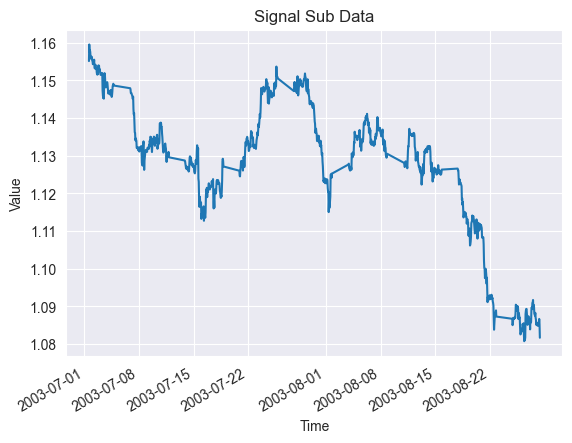

In [84]:
sub_data.close.plot()
plt.title("Signal Sub Data")
plt.xlabel("Time")
plt.ylabel("Value")

In [80]:
sub_data.reset_index(inplace=True)
sub_data = sub_data[["ds", "y"]]
sub_data.head()

,ds,y
0,2003-07-01 14:00:00,1.15514
1,2003-07-01 15:00:00,1.15955
2,2003-07-01 16:00:00,1.15758
3,2003-07-01 17:00:00,1.15804
4,2003-07-01 18:00:00,1.15756


In [81]:
model = Prophet()
model.fit(sub_data)

09:28:40 - cmdstanpy - INFO - Chain [1] start processing
09:28:40 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
test_data = data.iloc[2000:2250, :]
test_data.reset_index(inplace=True)
test_data = test_data[["ds", "close"]]

test_data.rename(columns={"close":"y"}, inplace=True)

test_data.head()


,ds,y
0,2003-08-28 11:00:00,1.08310
1,2003-08-28 12:00:00,1.08379
2,2003-08-28 13:00:00,1.08724
3,2003-08-28 14:00:00,1.09056
4,2003-08-28 15:00:00,1.08932


In [101]:
future_df = test_data.drop(columns=["y"])
future_df.head()

,ds
0,2003-08-28 11:00:00
1,2003-08-28 12:00:00
2,2003-08-28 13:00:00
3,2003-08-28 14:00:00
4,2003-08-28 15:00:00


In [117]:
forecast = model.predict(future_df)
forecast = forecast[["yhat", "yhat_upper", "yhat_lower"]]
forecast.index = test_data.ds
forecast["true_value"] = test_data["y"].values
forecast.head(3)

,yhat,yhat_upper,yhat_lower,true_value
ds,,,,
2003-08-28 11:00:00,1.076817,1.080765,1.072783,1.08310
2003-08-28 12:00:00,1.076313,1.080247,1.072068,1.08379
2003-08-28 13:00:00,1.076102,1.079939,1.071914,1.08724


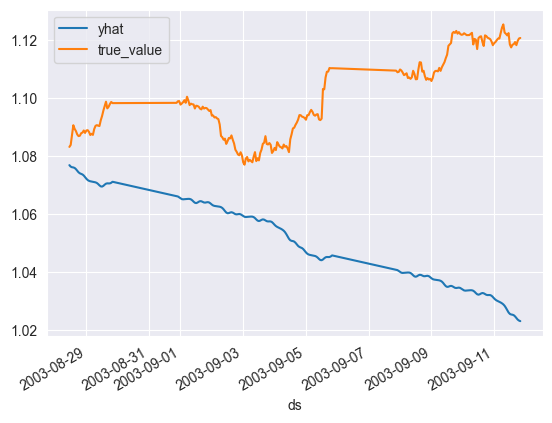

In [119]:
forecast[["yhat", "true_value"]].plot()
plt.legend()